머신러닝 따라하기

참고: https://lsjsj92.tistory.com/517?category=853217

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
feature_name_df = pd.read_csv("./features.txt", sep ='\s+', header = None, names =['column_index','column_name'])
feature_name = feature_name_df.iloc[:,1].values.tolist()
feature_name[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [12]:
def get_human_dataset():
    feature_name_df = pd.read_csv("./features.txt", sep ='\s+', header = None, names =['column_index','column_name'])
    feature_name = feature_name_df.iloc[:,1].values.tolist()
    
    X_train = pd.read_csv('./X_train.txt', sep ='\s+', names =feature_name)
    X_test = pd.read_csv('./X_test.txt', sep = '\s+', names = feature_name)
    y_train = pd.read_csv('./y_train.txt', sep = '\s+', header = None, names =['action'])
    y_test = pd.read_csv('./y_test.txt', sep = '\s+', header = None, names = ['action'])
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

/home/hadoop/anaconda2/envs/analysis/lib/python2.7/site-packages/pandas/io/parsers.py:702: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)
/home/hadoop/anaconda2/envs/analysis/lib/python2.7/site-packages/pandas/io/parsers.py:702: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [21]:
# null 값 확인
X_train.isna().sum().sum()

0

전처리 따로 하징낳고 머신러닝 모델 적용

Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [25]:
dt_clf = DecisionTreeClassifier(random_state = 11)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("점수 : {0:.4f}".format(accuracy))
print("결정트리 하이퍼파라미터 : \n", dt_clf.get_params())

점수 : 0.8612
('\xea\xb2\xb0\xec\xa0\x95\xed\x8a\xb8\xeb\xa6\xac \xed\x95\x98\xec\x9d\xb4\xed\x8d\xbc\xed\x8c\x8c\xeb\x9d\xbc\xeb\xaf\xb8\xed\x84\xb0 : \n', {'presort': False, 'splitter': 'best', 'min_impurity_decrease': 0.0, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'criterion': 'gini', 'random_state': 11, 'min_impurity_split': None, 'max_features': None, 'max_depth': None, 'class_weight': None})


In [32]:
# GridSearch를 이용해 hyper parameter바꾸면서 모델성능 평가
params = {
    'max_depth' : [6,8,10,12],
    'min_samples_leaf' : [16,24]
}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5, verbose = 1, return_train_score = True)
grid_cv.fit(X_train, y_train)
print('최고 평균 정확도 : {0: .4f}'.format(grid_cv.best_score_))
print('최고의 파라미터 :', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   57.6s finished


최고 평균 정확도 :  0.8565
('\xec\xb5\x9c\xea\xb3\xa0\xec\x9d\x98 \xed\x8c\x8c\xeb\x9d\xbc\xeb\xaf\xb8\xed\x84\xb0 :', {'max_depth': 8, 'min_samples_leaf': 24})


In [33]:
# hyper parameter별로 성능 나열하기
cv_result_df = pd.DataFrame(grid_cv.cv_results_)
cv_result_df[['params','mean_test_score','rank_test_score','mean_train_score']]

,params,mean_test_score,rank_test_score,mean_train_score
0,"{u'max_depth': 6, u'min_samples_leaf': 16}",0.845212,8,0.940665
1,"{u'max_depth': 6, u'min_samples_leaf': 24}",0.847797,7,0.937672
2,"{u'max_depth': 8, u'min_samples_leaf': 16}",0.854053,6,0.965316
3,"{u'max_depth': 8, u'min_samples_leaf': 24}",0.856502,1,0.954571
4,"{u'max_depth': 10, u'min_samples_leaf': 16}",0.854733,4,0.966574
5,"{u'max_depth': 10, u'min_samples_leaf': 24}",0.855141,2,0.955013
6,"{u'max_depth': 12, u'min_samples_leaf': 16}",0.854597,5,0.966643
7,"{u'max_depth': 12, u'min_samples_leaf': 24}",0.855005,3,0.955013


In [31]:
?grid_cv

In [35]:
# 제일 좋은 모델 가져오기
best_dt_clf = grid_cv.best_estimator_
pred1 = best_dt_clf.predict(X_test)
acc = accuracy_score(y_test, pred1)
print('정확도 : {0:.4f}'.format(acc))

정확도 : 0.8568


In [36]:
# 변수 중요도 도출하기
feature_importance = best_dt_clf.feature_importances_
feature_importance[:10]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00105205])

In [38]:
f_imp = pd.Series(feature_importance, index = X_train.columns)
f_imp = f_imp.sort_values(ascending = False)[:20]
f_imp

tGravityAcc-min()-X            0.262167
fBodyAcc-mad()-X               0.219978
angle(Y,gravityMean)           0.148491
fBodyAccMag-energy()           0.119495
tGravityAcc-arCoeff()-Z,2      0.105080
fBodyGyro-maxInds-X            0.024805
tBodyGyro-correlation()-Y,Z    0.017169
tGravityAcc-energy()-Y         0.017005
tGravityAccMag-arCoeff()1      0.013051
fBodyAcc-max()-Y               0.009131
tGravityAcc-max()-Y            0.006509
tBodyGyro-max()-X              0.006326
tBodyGyro-min()-X              0.004525
tBodyAcc-correlation()-X,Y     0.003824
fBodyAccMag-std()              0.003372
tGravityAcc-arCoeff()-Y,3      0.003130
angle(Z,gravityMean)           0.003091
fBodyGyro-iqr()-Y              0.002933
fBodyGyro-std()-X              0.002849
tBodyGyro-iqr()-X              0.002733
dtype: float64

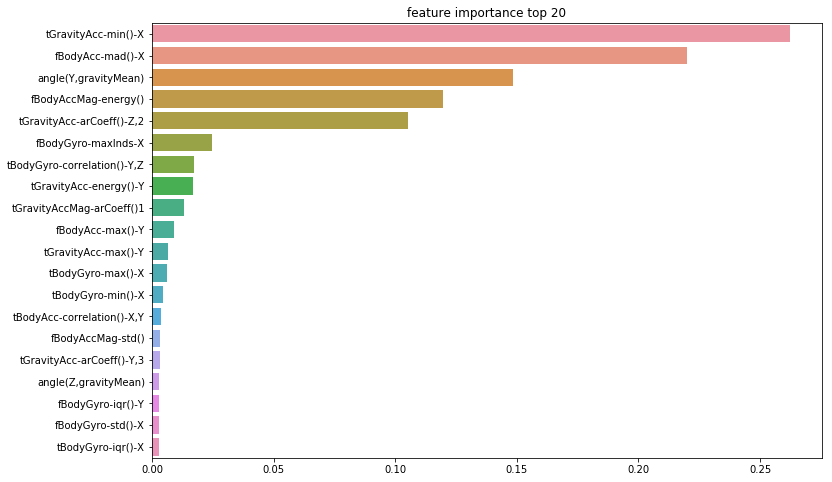

In [45]:
#시각화

plt.figure(figsize = (12,8))
plt.title("feature importance top 20")
sns.barplot(x=f_imp, y = f_imp.index)